In [16]:
import pandas as pd 

df = pd.read_csv("https://raw.githubusercontent.com/gokulsrin/PossibilityGeneration/main/EliData/EliLongGenData.csv")

In [2]:
concreteness = pd.read_csv("https://raw.githubusercontent.com/gokulsrin/PossibilityGeneration/main/Misc/Concreteness_ratings_Brysbaert_et_al_BRM.csv")

In [3]:
df

,id,context,answer,Probability,Morality,Normality,response
0,1,1,1,66,100,89.0,Ask family/friends for money.
1,1,1,2,61,100,80.0,Try and find it cheaper elsewhere.
2,1,1,3,42,53,47.0,Take out a loan.
3,1,1,4,74,83,76.0,Pay it anyways.
4,1,1,5,32,84,59.0,Try and haggle with insurance or seller.
...,...,...,...,...,...,...,...
9324,311,18,1,89,9,26.0,keep going and ignore the competitor
9325,311,18,2,91,92,84.0,stop and try to help them
9326,311,18,3,80,96,73.0,find a way to send a message to people that so...
9327,311,18,4,63,85,25.0,stop and also try and get other people to stop


In [4]:
#create concreteness dict
concreteness_dict = {}
for word, group in concreteness.groupby("Word"):
  rating = group["Conc.M"].values[0]
  concreteness_dict[word] = rating

In [5]:
#figure out if later generations are more or less concrete 
import string 

conc = []
nums = []
cdic = {}
for id, group in df.groupby("id"):
  for vign, group2 in group.groupby("context"):
    for num, group3 in group2.groupby("answer"):
      response = group3["response"].values[0]
      if not pd.isna(response):
        response = response.translate(str.maketrans('', '', string.punctuation))
        score = []
        l = len(response.split(" "))
        for word in response.split(" "):
          if word in concreteness_dict:
            score.append(concreteness_dict[word])
        if len(score) > 0:
          score = sum(score)/len(score)
          # score = (sum(score)/len(score))/l
          conc.append(score)
          nums.append(num)
          if num not in cdic:
            cdic[num] = []
          cdic[num].append(score)

In [6]:
#find averages in concreteness differences 
for key in cdic:
  cdic[key] = sum(cdic[key])/len(cdic[key])

print(cdic)

{1: 2.820641348381444, 2: 2.8068956147278126, 3: 2.7589991693990314, 4: 2.7571315393407465, 5: 2.7673785359113383}


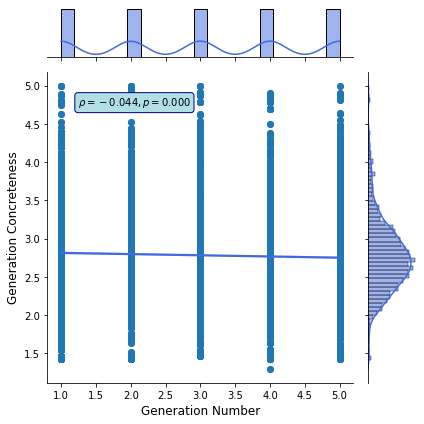

In [7]:
import numpy as np 

y = np.array(conc)
x = np.array(nums)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# a = np.random.rand(10)
# b = a * 2 + a ** 5

# print("The Rho is {}".format(np.corrcoef(a, b)[0][1]))

g = sns.jointplot(x=x, y=y, kind='reg', color='royalblue')
# ax.annotate(stats.pearsonr)
r, p = stats.pearsonr(x, y)
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
g.ax_joint.scatter(x, y)
g.set_axis_labels(xlabel='Generation Number', ylabel='Generation Concreteness', size=12)
plt.tight_layout()
plt.show()

In [8]:
!pip install sentence_transformers
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('sentence-transformers/paraphrase-MiniLM-L6-v2')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 2.4 MB/s 
     |████████████████████████████████| 4.4 MB 9.1 MB/s 
     |████████████████████████████████| 1.2 MB 58.3 MB/s 
     |████████████████████████████████| 101 kB 6.3 MB/s 
     |████████████████████████████████| 6.6 MB 53.9 MB/s 
     |████████████████████████████████| 596 kB 64.7 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=f8b03c91331eb4f739c7a517afdccd471f07af6e6f886ef7b5cfff5c85efd243
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


/usr/local/lib/python3.7/dist-packages/huggingface_hub/snapshot_download.py:11: FutureWarning: snapshot_download.py has been made private and will no longer be available from version 0.11. Please use `from huggingface_hub import snapshot_download` to import the only public function in this module. Other members of the file may be changed without a deprecation notice.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/huggingface_hub/file_download.py:563: FutureWarning: `cached_download` is the legacy way to download files from the HF hub, please consider upgrading to `hf_hub_download`
  FutureWarning,


Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/314 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [9]:
embeddings = []
res = []
transition_map = {}
for scenario, group in df.groupby("context"):
  for id, group1 in group.groupby("id"):
    responses = group1['response'].values.tolist()
    # for pnum, group2 in group1.groupby("generation_number"):
    for i in range(len(responses)):
      response = responses[i]
      if not pd.isna(response):
        res.append(response)
        embeddings.append(model.encode(response))
        if i < len(responses)-1 and not pd.isna(responses[i+1]):
          transition_map[response] = responses[i+1]
  # break

In [10]:
from sklearn.cluster import KMeans
# clustering after doing PCA here
embeddings = pd.DataFrame(embeddings)

# this is the number we'll have to modify
num_clusters = 50
kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(embeddings)
labels = kmeans.labels_

embeddings["cluster"] = labels


In [13]:
cluster_dict = {}
for i in range(len(res)):
  cluster_dict[res[i]] = labels[i]


In [17]:
df

,id,context,answer,Probability,Morality,Normality,response
0,1,1,1,66,100,89.0,Ask family/friends for money.
1,1,1,2,61,100,80.0,Try and find it cheaper elsewhere.
2,1,1,3,42,53,47.0,Take out a loan.
3,1,1,4,74,83,76.0,Pay it anyways.
4,1,1,5,32,84,59.0,Try and haggle with insurance or seller.
...,...,...,...,...,...,...,...
9324,311,18,1,89,9,26.0,keep going and ignore the competitor
9325,311,18,2,91,92,84.0,stop and try to help them
9326,311,18,3,80,96,73.0,find a way to send a message to people that so...
9327,311,18,4,63,85,25.0,stop and also try and get other people to stop


In [29]:
# we could give participants trajectories in terms of the clusters they belong to 
# to visualize them, we could do PCA (to reduce from 6d to 2d )
# take two different participants, and see if the difference between their vectors for n-1 vignettes will predict difference on nth vignette 

#first, just just visualize all trajctories 
trajectories = pd.DataFrame()
# who the trajectories came from 
inds = []
#map to an individual all of their distinct trajectories across vignettes

#crucially, we will only be using the first 103 participants here - though we could use more
id_trajectories = {}
for id, group in df.groupby("id"):
  for vign, group2 in group.groupby("context"):
    t = []
    for response in group2["response"]:
      if not pd.isna(response): 
        t.append(cluster_dict[response])
    #all ids before this basically contain the first 6 vignettes
    if id <= 104:
      trajectories = trajectories.append(pd.DataFrame(t).T, ignore_index=True)
      inds.append(id)
      if id not in id_trajectories:
        id_trajectories[id] = {}
      id_trajectories[id][vign] = t

In [19]:
from numpy import dot
from numpy.linalg import norm

In [30]:
vignette_order = []
for vign in id_trajectories[inds[0]]:
  vignette_order.append(vign)
vignette_order = vignette_order[:-1]
last_vign = 6

In [33]:
inds = []
for id in id_trajectories:
  inds.append(id)

In [34]:
len(inds)

103

In [35]:
#ask to what extent similarity in clusters trajectories between two particiapnts for n-1 vignettes (avg diff) can predict similarity in nth vignette
# could look at median value
# the plot changes drastically when the avg for all 10 is used to predict 1 
x = []
y = []
for i in range(len(inds)):
  for j in range(i+1,len(inds)):
    #ensure they have the same # of vigns 
    if len(id_trajectories[inds[i]]) == len(id_trajectories[inds[j]]) == 6:
      avg_sim = []
      #for the first 5 vignettes, find the average cosine sim between trajectory vectors
      for vign in vignette_order:
        #cosine sim
        a = id_trajectories[inds[i]][vign]
        b = id_trajectories[inds[j]][vign]
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        #ensure this is not NAN
        if not pd.isna(cos_sim):
          avg_sim.append(cos_sim)
      # if the avg_sim we calculated was valid
      if len(avg_sim) > 0:
        avg_sim = sum(avg_sim)/len(avg_sim)
        #find the cos sim of the last vign
        a = id_trajectories[inds[i]][last_vign]
        b = id_trajectories[inds[j]][last_vign]
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        #ensure it is not NAN
        if not pd.isna(cos_sim) and cos_sim > 0 and cos_sim < 1 and avg_sim > 0:
          x.append(avg_sim)
          y.append(cos_sim)    

In [36]:
len(x)

5253

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

x = np.array(x)
y = np.array(y)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
predict_y = intercept + slope * x

In [38]:
r_value, p_value

(0.04673312747266463, 0.000703659868568694)

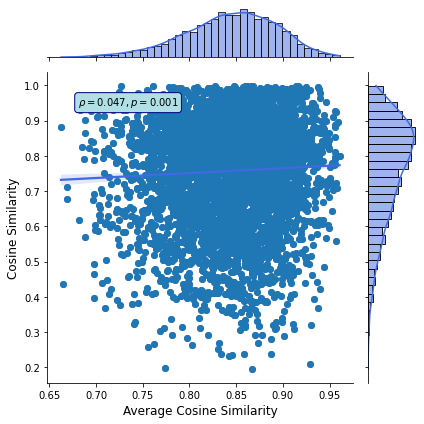

In [39]:
# if we remove y = 0 data, what happens

# a = np.random.rand(10)
# b = a * 2 + a ** 5

# print("The Rho is {}".format(np.corrcoef(a, b)[0][1]))

g = sns.jointplot(x=x, y=y, kind='reg', color='royalblue')
# ax.annotate(stats.pearsonr)
r, p = stats.pearsonr(x, y)
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
g.ax_joint.scatter(x, y)
g.set_axis_labels(xlabel='Average Cosine Similarity', ylabel='Cosine Similarity', size=12)
plt.tight_layout()
plt.show()

## Do the above analysis again but with different individuals


In [42]:
# we could give participants trajectories in terms of the clusters they belong to 
# to visualize them, we could do PCA (to reduce from 6d to 2d )
# take two different participants, and see if the difference between their vectors for n-1 vignettes will predict difference on nth vignette 

#first, just just visualize all trajctories 
trajectories = pd.DataFrame()
# who the trajectories came from 
inds = []
#map to an individual all of their distinct trajectories across vignettes

#crucially, we will only be using the first 103 participants here - though we could use more
id_trajectories = {}
for id, group in df.groupby("id"):
  for vign, group2 in group.groupby("context"):
    t = []
    for response in group2["response"]:
      if not pd.isna(response): 
        t.append(cluster_dict[response])
    #all ids before this basically contain the first 6 vignettes
    if 104 < id <= 208:
      trajectories = trajectories.append(pd.DataFrame(t).T, ignore_index=True)
      inds.append(id)
      if id not in id_trajectories:
        id_trajectories[id] = {}
      id_trajectories[id][vign] = t

In [49]:
vignette_order = []
for vign in id_trajectories[inds[0]]:
  vignette_order.append(vign)
last_vign = vignette_order[-1]
vignette_order = vignette_order[:-1]

In [46]:
inds = []
for id in id_trajectories:
  inds.append(id)

In [47]:
len(inds)

104

In [50]:
#ask to what extent similarity in clusters trajectories between two particiapnts for n-1 vignettes (avg diff) can predict similarity in nth vignette
# could look at median value
# the plot changes drastically when the avg for all 10 is used to predict 1 
x = []
y = []
for i in range(len(inds)):
  for j in range(i+1,len(inds)):
    #ensure they have the same # of vigns 
    if len(id_trajectories[inds[i]]) == len(id_trajectories[inds[j]]) == 6:
      avg_sim = []
      #for the first 5 vignettes, find the average cosine sim between trajectory vectors
      for vign in vignette_order:
        #cosine sim
        a = id_trajectories[inds[i]][vign]
        b = id_trajectories[inds[j]][vign]
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        #ensure this is not NAN
        if not pd.isna(cos_sim):
          avg_sim.append(cos_sim)
      # if the avg_sim we calculated was valid
      if len(avg_sim) > 0:
        avg_sim = sum(avg_sim)/len(avg_sim)
        #find the cos sim of the last vign
        a = id_trajectories[inds[i]][last_vign]
        b = id_trajectories[inds[j]][last_vign]
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        #ensure it is not NAN
        if not pd.isna(cos_sim) and cos_sim > 0 and cos_sim < 1 and avg_sim > 0:
          x.append(avg_sim)
          y.append(cos_sim)    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


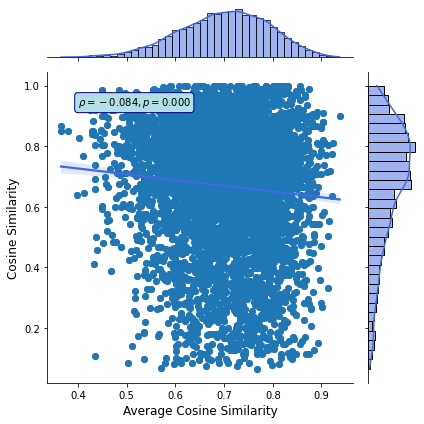

In [52]:
# if we remove y = 0 data, what happens

# a = np.random.rand(10)
# b = a * 2 + a ** 5

# print("The Rho is {}".format(np.corrcoef(a, b)[0][1]))

g = sns.jointplot(x=x, y=y, kind='reg', color='royalblue')
# ax.annotate(stats.pearsonr)
r, p = stats.pearsonr(x, y)
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
g.ax_joint.scatter(x, y)
g.set_axis_labels(xlabel='Average Cosine Similarity', ylabel='Cosine Similarity', size=12)
plt.tight_layout()
plt.show()

# Same analysis again but with last group of individuals

In [65]:
# we could give participants trajectories in terms of the clusters they belong to 
# to visualize them, we could do PCA (to reduce from 6d to 2d )
# take two different participants, and see if the difference between their vectors for n-1 vignettes will predict difference on nth vignette 

#first, just just visualize all trajctories 
trajectories = pd.DataFrame()
# who the trajectories came from 
inds = []
#map to an individual all of their distinct trajectories across vignettes

#crucially, we will only be using the first 103 participants here - though we could use more
id_trajectories = {}
for id, group in df.groupby("id"):
  for vign, group2 in group.groupby("context"):
    t = []
    for response in group2["response"]:
      if not pd.isna(response): 
        t.append(cluster_dict[response])
    #all ids before this basically contain the first 6 vignettes
    if id > 208 and len(t) == 5:
      trajectories = trajectories.append(pd.DataFrame(t).T, ignore_index=True)
      inds.append(id)
      if id not in id_trajectories:
        id_trajectories[id] = {}
      id_trajectories[id][vign] = t

In [67]:
id_trajectories

{209: {13: [30, 5, 6, 6, 43],
  14: [45, 36, 1, 34, 12],
  15: [13, 16, 16, 13, 13],
  16: [15, 24, 7, 34, 4],
  17: [40, 12, 43, 38, 38],
  18: [8, 15, 40, 8, 26]},
 210: {13: [9, 26, 4, 30, 6],
  14: [36, 36, 36, 36, 36],
  15: [13, 16, 16, 13, 13],
  16: [14, 4, 16, 15, 24],
  17: [47, 4, 38, 38, 38],
  18: [14, 40, 33, 44, 14]},
 211: {13: [30, 30, 5, 6, 9],
  14: [15, 31, 15, 15, 36],
  15: [13, 12, 15, 34, 10],
  16: [4, 34, 35, 14, 4],
  17: [12, 34, 43, 38, 47],
  18: [28, 15, 7, 15, 9]},
 212: {13: [5, 6, 19, 5, 4],
  14: [36, 36, 36, 11, 36],
  15: [34, 13, 7, 16, 16],
  16: [16, 37, 15, 24, 21],
  17: [38, 47, 43, 14, 43],
  18: [40, 34, 7, 33, 8]},
 213: {13: [30, 4, 6, 6, 4],
  14: [36, 45, 36, 36, 15],
  15: [13, 2, 19, 4, 16],
  16: [39, 1, 39, 37, 16],
  17: [38, 12, 47, 47, 47],
  18: [21, 21, 21, 21, 9]},
 214: {13: [9, 4, 49, 34, 10],
  14: [45, 3, 36, 15, 36],
  15: [49, 10, 13, 10, 12],
  16: [39, 15, 39, 40, 39],
  17: [47, 12, 43, 38, 43],
  18: [34, 40, 8, 8, 26

In [68]:
vignette_order = []
for vign in id_trajectories[inds[0]]:
  vignette_order.append(vign)
last_vign = vignette_order[-1]
vignette_order = vignette_order[:-1]

In [69]:
inds = []
for id in id_trajectories:
  inds.append(id)

In [70]:
len(inds)

103

In [71]:
#ask to what extent similarity in clusters trajectories between two particiapnts for n-1 vignettes (avg diff) can predict similarity in nth vignette
# could look at median value
# the plot changes drastically when the avg for all 10 is used to predict 1 
x = []
y = []
for i in range(len(inds)):
  for j in range(i+1,len(inds)):
    #ensure they have the same # of vigns 
    if len(id_trajectories[inds[i]]) == len(id_trajectories[inds[j]]):
      avg_sim = []
      #for the first 5 vignettes, find the average cosine sim between trajectory vectors
      for vign in vignette_order:
        #cosine sim
        a = id_trajectories[inds[i]][vign]
        b = id_trajectories[inds[j]][vign]
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        #ensure this is not NAN
        if not pd.isna(cos_sim):
          avg_sim.append(cos_sim)
      # if the avg_sim we calculated was valid
      if len(avg_sim) > 0:
        avg_sim = sum(avg_sim)/len(avg_sim)
        #find the cos sim of the last vign
        a = id_trajectories[inds[i]][last_vign]
        b = id_trajectories[inds[j]][last_vign]
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        #ensure it is not NAN
        if not pd.isna(cos_sim) and cos_sim > 0 and cos_sim < 1 and avg_sim > 0:
          x.append(avg_sim)
          y.append(cos_sim)    

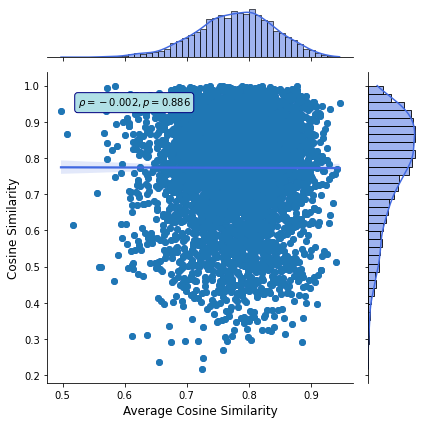

In [72]:
# if we remove y = 0 data, what happens

# a = np.random.rand(10)
# b = a * 2 + a ** 5

# print("The Rho is {}".format(np.corrcoef(a, b)[0][1]))

g = sns.jointplot(x=x, y=y, kind='reg', color='royalblue')
# ax.annotate(stats.pearsonr)
r, p = stats.pearsonr(x, y)
g.ax_joint.annotate(f'$\\rho = {r:.3f}, p = {p:.3f}$',
                    xy=(0.1, 0.9), xycoords='axes fraction',
                    ha='left', va='center',
                    bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'})
g.ax_joint.scatter(x, y)
g.set_axis_labels(xlabel='Average Cosine Similarity', ylabel='Cosine Similarity', size=12)
plt.tight_layout()
plt.show()